# (Factors affecting Borrower interest rate?)
## by (Amira Salama)

## Investigation Overview

> Investigating factors affecting borrower’s APR or interest rate, and loan’s outcome status


## Dataset Overview

> Prosper Marketplace is America's first peer-to-peer lending marketplace, with over $7 billion in funded loans, Borrowers request personal loans on Prosper and investors (individual or institutional) can fund anywhere from USD 2000 to USD 40000 per loan request.

> Investors can consider borrowers’ credit scores, ratings, and histories and the category of the loan. Prosper handles the servicing of the loan and collects and distributes borrower payments and interest back to the loan investors.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
df = pd.read_csv('prosperLoanData.csv')

## Interest Rate Ranges

> Borrower Annual Percentage Rate in the Dataset takes on a relatively small ranges of value particularly between 0.15 to 0.41, after plotting the distribution the values seem normally distributed except for a peak in value between 0.32 and 0.37%

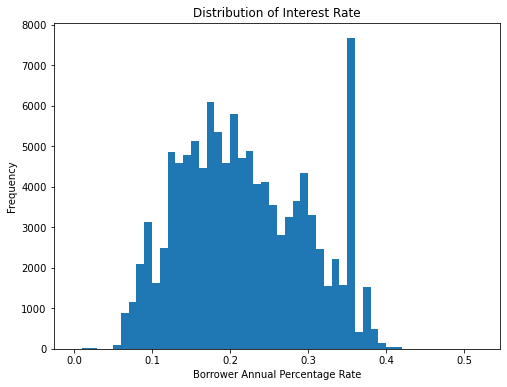

In [3]:
# plotting a histogram of the BorrowerAPR variable
bins = np.arange(0, df['BorrowerAPR'].max()+ 0.01 ,  0.01)
plt.figure(figsize=[8,6])
plt.hist(data=df, x= 'BorrowerAPR', bins = bins)
plt.title('Distribution of Interest Rate')
plt.xlabel('Borrower Annual Percentage Rate')
plt.ylabel('Frequency');

## Income Ranges Vs Interest rate and Amount
> The Most Accepted Income ranges are between 25k and 75k, the higher income range the higher the loan amount and the less rate applied on the loan.

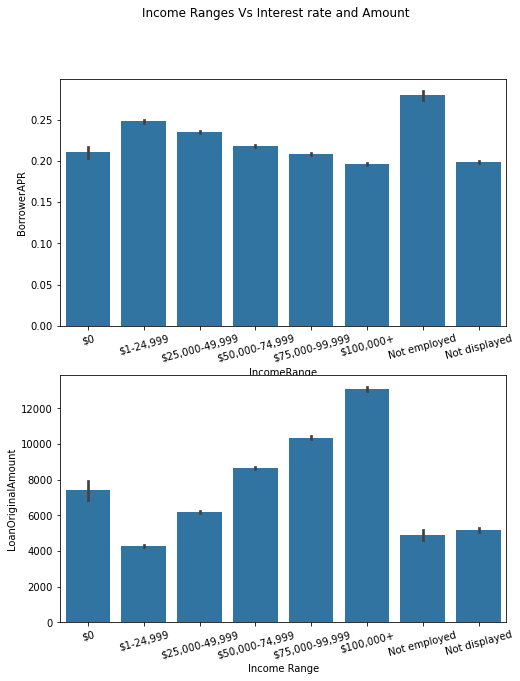

In [4]:
# plotting a bar graph between income ranges , BorrowerAPR and loan original amount
order = ['$0','$1-24,999','$25,000-49,999','$50,000-74,999', '$75,000-99,999','$100,000+','Not employed','Not displayed']
base_color = sb.color_palette()[0]

fig, ax = plt.subplots(nrows = 2, figsize = [8,10])
sb.barplot(data=df, x='IncomeRange', y ='BorrowerAPR', color=base_color, order = order ,ax = ax[0])

sb.barplot(data=df, x='IncomeRange', y='LoanOriginalAmount', color=base_color, order=order,ax = ax[1])
plt.ylabel('LoanOriginalAmount')
plt.xlabel('Income Range')
plt.suptitle('Income Ranges Vs Interest rate and Amount')
for ax in fig.axes:
    plt.sca(ax)
    plt.xticks(rotation=15)

## Interest Rate Vs Credit Score Range

>The Credit Score Range is a three-digit number, typically between 300 and 850, designed to represent a borrower's credit risk, or the likelihood he/she will pay their bills on time, after plotting the relationship between interest rate and credit score range, a negative relationship was spotted.   

>Higher Credit score Ranges are associated with less loan rate applied.the higher the score the more liable for a borrower to get the loan, above 70% of the scores are higher than 580 score which is the fair score or the accepted one.


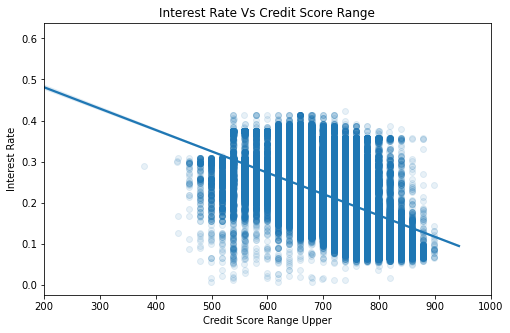

In [5]:
# plotting a regplot for BorrowerAPR and CreditScoreRangeUpper
plt.figure(figsize=[8, 5])
sb.regplot(data=df, x='CreditScoreRangeUpper', y='BorrowerAPR', x_jitter=0.3,
           scatter_kws = {'alpha':1/10}, truncate = False )
plt.xlabel('Credit Score Range Upper')
plt.ylabel('Interest Rate')
plt.xlim([200, 1000])
plt.title('Interest Rate Vs Credit Score Range');

## Loan Amount Vs Interest Rate

>After that I wanted to investigate the relationship between the Interest rate and the loan amount, the scatterplot shows that there's a negative relationship between borrower APR (Interest Rate) and  the Loan Original Amount, the higher the loan amount, the less the rate applied.

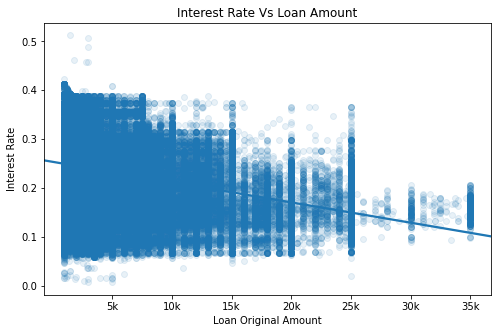

In [6]:
 # plotting a regplot for BorrowerAPR and Loan Original Amount
plt.figure(figsize=[8, 5])
sb.regplot(data=df, x='LoanOriginalAmount', y='BorrowerAPR', x_jitter= 0.3,
           scatter_kws = {'alpha':1/10}, truncate = False )
plt.xticks([5e3, 10e3, 15e3, 20e3, 25e3, 30e3, 35e3], ['5k', '10k','15k','20k', '25k', '30k', '35k'])
plt.xlabel('Loan Original Amount')
plt.ylabel('Interest Rate')
plt.title('Interest Rate Vs Loan Amount');

## Loan Status Vs Amount and income ranges
> Current loan status is at it's highest among income range of + 100K USD also the chargedoff loans are the highest for that category, so a higher income is also associated with a relative high risk of defaulting. 

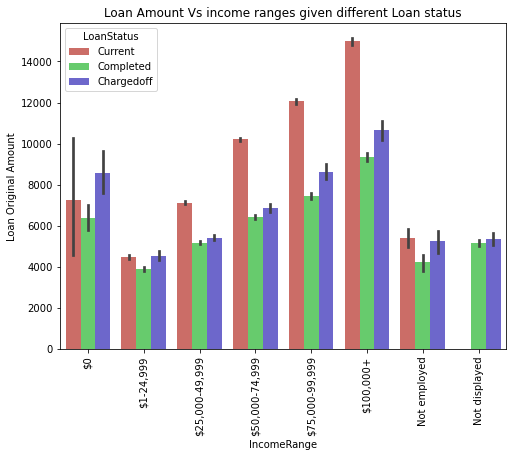

In [7]:
# Plotting a barplot for Loan Original Amount relation with Income ranges given the loan status is current, completed or charged off
plt.figure(figsize=[8,6])
sb.barplot(data=df, x='IncomeRange',y='LoanOriginalAmount' ,hue='LoanStatus',
             hue_order=['Current','Completed','Chargedoff'], palette='hls', order=order)
plt.xticks(rotation = 90)
plt.ylabel('Loan Original Amount')
plt.title('Loan Amount Vs income ranges given different Loan status');

## Loan Amount Vs prosper score and what affects the loan Status
> The prosper score is a custom risk score built using historical Prosper data. The score ranges from 1-10, with 10 being the best, or lowest risk score. Applicable for loans originated after July 2009. The higher the Prosper score the higher the chance that the Loan Amount will be repayed and less probability of defaulting.

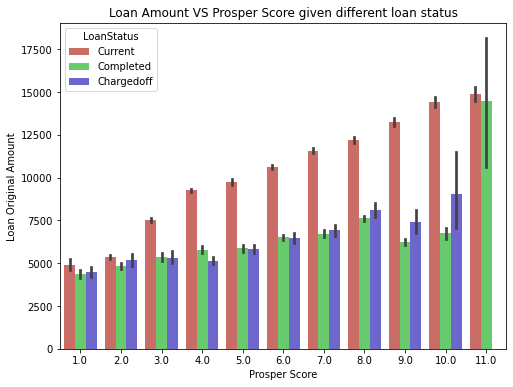

In [8]:
# Plotting a barplot for Loan Original Amount relation with prosper score given the loan status is current, completed or charged off
plt.figure(figsize=[8,6])
sb.barplot(data=df, x='ProsperScore', y='LoanOriginalAmount',  hue='LoanStatus',
           hue_order=['Current','Completed','Chargedoff'], palette='hls')
plt.ylabel('Loan Original Amount')
plt.xlabel('Prosper Score')
plt.title('Loan Amount VS Prosper Score given different loan status');